# KoikatuCharaLoader Testing Ground

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/great-majority/KoikatuCharaLoader/blob/main/notebooks/sandbox.ipynb)

This notebook allows you to try out KoikatuCharaLoader [![GitHub](https://img.shields.io/badge/GitHub-Repository-blue?logo=github)](https://github.com/great-majority/KoikatuCharaLoader) directly in your browser.

It runs in an isolated environment on Google Colab, so you can freely upload and use your own files here without affecting your local system.

To execute each cell, press `Shift+Enter` or click the ▶️ button on the left.

## Installing and Importing Modules

In [ ]:
%pip install kkloader

In [ ]:
from kkloader import KoikatuCharaData as kcd

## Loading Character Data

In [ ]:

import requests

# Downloading a mod character from the GitHub repository.
url = "https://raw.githubusercontent.com/great-majority/KoikatuCharaLoader/refs/heads/master/data/kk_mod_chara.png"

response = requests.get(url, stream=True)
image = response.content

# Loading a Koikatsu character
kc = kcd.load(image)

# Alternatively, you can upload a character file and load it by uncommenting the code below.
# from google.colab import files
# uploaded = files.upload()
# filename = list(uploaded.keys())[0]
# kc = kcd.load(f"/content/{filename}")


## Inspecting the Data

### The Blockdata

In [ ]:
# `blockdata` shows what kind of data is stored in it.
kc.blockdata

['KKEx', 'Custom', 'Coordinate', 'Parameter', 'Status', 'About']

What kind of data is stored in each `blockdata` block?

| Block Data Name | Description |
|-----------------|-------------|
| Custom          | Contains settings for facial features, body shape, and hairstyle. |
| Coordinate      | Contains settings for clothing and accessories. |
| Parameter       | Contains settings such as name and birthday. |
| Status          | Contains variables like clothing state, but it's unclear how they affect the game. |
| About           | Contains the author ID and data ID. This block was added starting from Koikatsu Sunshine. |
| KKEx            | A data block that contains various mod-related data. |


### Image Data


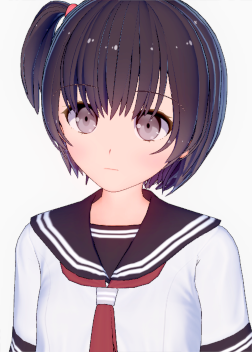
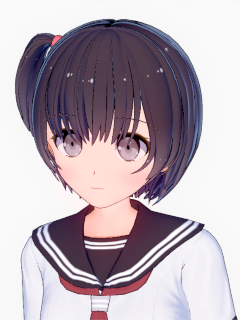

In [ ]:
from IPython.display import display, HTML
from base64 import b64encode

# `image` contains the character's PNG image, and `face_image` contains the face image used for status display
b64_1 = b64encode(kc.image).decode('utf-8')
b64_2 = b64encode(kc.face_image).decode('utf-8')

# Display in HTML
html = f'''
<div style="display: flex;">
  <img src="data:image/png;base64,{b64_1}" style="margin-right:10px;" width="200">
  <img src="data:image/png;base64,{b64_2}" width="200">
</div>
'''

display(HTML(html))

### Displaying Data Structure

In [ ]:
# You can use the `prettify` method to display the contents of the data in a more readable format.
kc["Parameter"].prettify()

{
  "version": "0.0.6",
  "sex": 1,
  "exType": 0,
  "lastname": "\u9ed2\u5d0e",
  "firstname": "\u67da\u82b1",
  "nickname": "\u30cf\u30eb\u30ca",
  "callType": -1,
  "personality": 26,
  "bloodType": 1,
  "birthMonth": 11,
  "birthDay": 3,
  "clubActivities": 1,
  "voiceRate": 0.5,
  "weakPoint": 1,
  "awnser": {
    "animal": false,
    "eat": false,
    "cook": false,
    "exercise": false,
    "study": true,
    "fashionable": false,
    "blackCoffee": false,
    "spicy": true,
    "sweet": false,
    "ExtendedSaveData": null
  },
  "denial": {
    "kiss": true,
    "aibu": true,
    "anal": false,
    "massage": false,
    "notCondom": true,
    "ExtendedSaveData": null
  },
  "interest": {
    "answer": [
      1,
      3
    ],
    "ExtendedSaveData": null
  },
  "attribute": {
    "harapeko": false,
    "choroi": true,
    "dokusyo": false,
    "ongaku": false,
    "okute": false,
    "friendly": true,
    "kireizuki": false,
    "sinsyutu": false,
    "hitori": false,
    "ac

In [ ]:
# Alternatively, you can access the objects directly from `data`
kc["Parameter"].data

{'version': '0.0.6',
 'sex': 1,
 'exType': 0,
 'lastname': '黒崎',
 'firstname': '柚花',
 'nickname': 'ちかりん',
 'callType': -1,
 'personality': 26,
 'bloodType': 1,
 'birthMonth': 11,
 'birthDay': 3,
 'clubActivities': 1,
 'voiceRate': 0.5,
 'weakPoint': 1,
 'awnser': {'animal': False,
  'eat': False,
  'cook': False,
  'exercise': False,
  'study': True,
  'fashionable': False,
  'blackCoffee': False,
  'spicy': True,
  'sweet': False,
  'ExtendedSaveData': None},
 'denial': {'kiss': True,
  'aibu': True,
  'anal': False,
  'massage': False,
  'notCondom': True,
  'ExtendedSaveData': None},
 'interest': {'answer': [1, 3], 'ExtendedSaveData': None},
 'attribute': {'harapeko': False,
  'choroi': True,
  'dokusyo': False,
  'ongaku': False,
  'okute': False,
  'friendly': True,
  'kireizuki': False,
  'sinsyutu': False,
  'hitori': False,
  'active': True,
  'majime': False,
  'info': False,
  'love': False,
  'talk': False,
  'nakama': True,
  'nonbiri': False,
  'hinnyo': False,
  'likeGirl

In [ ]:
# The full name is stored directly in `lastname` and `firstname`
print(kc["Parameter"]["lastname"], kc["Parameter"]["firstname"])
print(kc["Parameter"]["nickname"])

黒崎 柚花
ハルナ


In [ ]:
# The `Custom` block contains configuration values for the face, body, and hairstyle

print("face")
display(kc["Custom"]["face"].keys())

print("body")
display(kc["Custom"]["body"].keys())

print("hair")
display(kc["Custom"]["hair"].keys())

face


dict_keys(['version', 'shapeValueFace', 'headId', 'skinId', 'detailId', 'detailPower', 'cheekGlossPower', 'eyebrowId', 'eyebrowColor', 'noseId', 'pupil', 'hlUpId', 'hlUpColor', 'hlDownId', 'hlDownColor', 'whiteId', 'whiteBaseColor', 'whiteSubColor', 'pupilWidth', 'pupilHeight', 'pupilX', 'pupilY', 'hlUpX', 'hlDownX', 'hlUpY', 'hlDownY', 'eyelineUpId', 'eyelineUpWeight', 'eyelineDownId', 'eyelineColor', 'moleId', 'moleColor', 'moleLayout', 'lipLineId', 'lipLineColor', 'lipGlossPower', 'doubleTooth', 'baseMakeup', 'foregroundEyes', 'foregroundEyebrow', 'ExtendedSaveData'])

body


dict_keys(['version', 'shapeValueBody', 'bustSoftness', 'bustWeight', 'skinId', 'detailId', 'detailPower', 'skinMainColor', 'skinSubColor', 'skinGlossPower', 'paintId', 'paintColor', 'paintLayoutId', 'paintLayout', 'sunburnId', 'sunburnColor', 'nipId', 'nipColor', 'nipGlossPower', 'areolaSize', 'underhairId', 'underhairColor', 'nailColor', 'nailGlossPower', 'drawAddLine', 'typeBone', 'ExtendedSaveData'])

hair


dict_keys(['version', 'parts', 'kind', 'glossId', 'ExtendedSaveData'])

In [ ]:
# The facial and body parameters set by sliders are stored in the `shapeValue*` fields
# These [0, 1] values correspond to [0, 100] in the game (though in modded environments, they can exceed this range)
display(kc["Custom"]["face"]["shapeValueFace"])
display(kc["Custom"]["body"]["shapeValueBody"])

[0.9215484261512756,
 0.11999999731779099,
 0.0,
 0.4838709533214569,
 0.15000000596046448,
 0.25354838371276855,
 0.09612901508808136,
 0.2800000011920929,
 0.05999999865889549,
 0.3709677457809448,
 0.5,
 0.10999999940395355,
 0.25580647587776184,
 0.13709677755832672,
 0.18000000715255737,
 0.46000000834465027,
 0.26903223991394043,
 0.33000001311302185,
 0.3499999940395355,
 0.8435486555099487,
 0.7048386931419373,
 0.725806474685669,
 0.5809677243232727,
 0.5572581887245178,
 0.8467742204666138,
 0.5403226017951965,
 0.7903226017951965,
 0.6222580671310425,
 0.43828994035720825,
 0.9032257795333862,
 0.8646453619003296,
 0.12803293764591217,
 0.1599999964237213,
 1.0,
 1.0,
 0.5161290168762207,
 0.6700000166893005,
 0.14516128599643707,
 0.4359999895095825,
 0.3975161910057068,
 0.6470000147819519,
 0.6000000238418579,
 0.0,
 0.37741944193840027,
 0.05806461349129677,
 0.28064554929733276,
 0.4322580397129059,
 0.5,
 0.5,
 0.5,
 0.0,
 0.0]

[0.1854838728904724,
 0.30725792050361633,
 0.11729028075933456,
 0.058838751167058945,
 0.3306451737880707,
 0.725806474685669,
 0.5064514875411987,
 0.5064520239830017,
 0.04112914204597473,
 0.660387396812439,
 0.13277417421340942,
 0.3123548626899719,
 0.34045156836509705,
 0.3145161271095276,
 0.10161282867193222,
 0.14516128599643707,
 0.46993574500083923,
 0.0,
 0.5333226323127747,
 0.0,
 0.5080645680427551,
 0.09300041198730469,
 0.0,
 0.05296780914068222,
 0.19354838132858276,
 0.08367735147476196,
 0.09677388519048691,
 0.46116092801094055,
 0.4379998445510864,
 0.16935484111309052,
 0.5645161271095276,
 0.16129031777381897,
 0.40354833006858826,
 0.26309674978256226,
 0.16709671914577484,
 0.2726452052593231,
 0.11641936004161835,
 0.5246451497077942,
 0.5746452212333679,
 0.12951622903347015,
 0.4395160675048828,
 0.3219032287597656,
 0.40645158290863037,
 0.6617096662521362]

### Data Structure from Modding Data

In [ ]:
for k in sorted(kc["KKEx"].data.keys()):
  print(k)

display(kc["KKEx"]["orange.spork.advikplugin"])

KK_PregnancyPlus
LewdCrestX
Marco.SkinEffects
com.bepis.sideloader.universalautoresolver
marco.authordata
moreAccessories
orange.spork.advikplugin
org.njaecha.plugins.editfangs
org.njaecha.plugins.objimport


[0,
 {'ShoulderRotatorEnabled': False,
  'IndependentShoulders': False,
  'ReverseShoulderL': False,
  'ReverseShoulderR': False,
  'ShoulderWeight': 1.5,
  'ShoulderRightWeight': 1.5,
  'ShoulderOffset': 0.20000000298023224,
  'ShoulderRightOffset': 0.20000000298023224,
  'SpineStiffness': 0.0,
  'EnableSpineFKHints': False,
  'EnableShoulderFKHints': False,
  'EnableToeFKHints': False,
  'EnableHeelzHoverAll': False,
  'EnableHeelzHoverLeftFoot': False,
  'EnableHeelzHoverRightFoot': False,
  'BreathingEnabled': False,
  'BreathingIntakePause': 0.05000000074505806,
  'BreathingHoldPause': 0.10000000149011612,
  'BreathingInhalePercentage': 0.6000000238418579,
  'BreathingBPM': 15,
  'MagnitudeData': True,
  'BreathingMagnitude.x': 1.0,
  'BreathingMagnitude.y': 1.0,
  'BreathingMagnitude.z': 1.0,
  'BreathingUpperChestScaling.x': 0.03999999910593033,
  'BreathingUpperChestScaling.y': 0.20000000298023224,
  'BreathingUpperChestScaling.z': 0.02500000037252903,
  'BreathingLowerChestSca

## Saving the Data

In [ ]:
import tempfile

# Temporary file for saving the data
tmpfile = tempfile.NamedTemporaryFile(delete=False)

# Try changing the nickname
print(kc["Parameter"]["nickname"])
kc["Parameter"]["nickname"] = "ちかりん"
kc.save(tmpfile.name)

# Reload and confirm that the data has been updated
kc2 = kcd.load(tmpfile.name)
print(kc2["Parameter"]["nickname"])

ハルナ
ちかりん
